In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

In [4]:
religious_df = pd.read_csv("C:/Users/uramac/OneDrive/Documents/BDS_documents/BDS_hackathon/train_data.csv", delimiter = ";")
religious_df

,subject,country,rel_1,rel_2,rel_3,rel_4,rel_5,rel_6,rel_7,rel_8,...,gender,ses,education,ethnicity,denomination,gdp,gdp_scaled,sample_type,compensation,attention_check
0,5362,Ireland,0.833333,0.857143,1.0,1,0.833333,0.833333,1.000000,1.00,...,woman,6.0,4,Caucasian/European,Christian (Roman Catholic),78806.431996,1.973267,online panel,monetary reward,1
1,10070,UK,0.000000,0.000000,0.0,0,0.166667,0.166667,0.166667,0.00,...,woman,5.0,3,Caucasian/European,NaN,42491.364435,0.332479,online panel,monetary reward,1
2,9515,Turkey,0.000000,0.000000,0.5,0,0.000000,0.500000,0.000000,0.00,...,man,6.0,5,Middle-Eastern/Arab,NaN,9311.366117,-1.166661,online panel,monetary reward,1
3,5960,Israel,0.500000,0.428571,0.5,0,0.166667,0.500000,0.666667,0.25,...,woman,7.0,4,Mixed / other,NaN,41613.998082,0.292837,students,course credit,1
4,6935,Lithuania,0.000000,0.000000,0.5,1,0.166667,0.666667,0.166667,0.00,...,woman,7.0,3,Caucasian/European,Christian (Roman Catholic),19089.707506,-0.724855,students,no compensation,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,6876,Japan,0.000000,0.142857,0.5,0,0.666667,0.500000,0.666667,0.00,...,woman,5.0,3,East Asian,NaN,39286.737649,0.187687,online panel,monetary reward,1
9477,6507,Japan,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.00,...,man,3.0,3,East Asian,NaN,39286.737649,0.187687,online panel,monetary reward,1
9478,975,Brazil,0.833333,0.857143,1.0,1,0.833333,1.000000,1.000000,1.00,...,woman,4.0,2,Latin-American,Evangelical,8920.762105,-1.184309,mixed,no compensation + course credit,1
9479,10378,US,0.166667,0.714286,1.0,0,1.000000,0.666667,1.000000,0.25,...,woman,5.0,5,Caucasian/European,NaN,62641.014570,1.242880,online panel,monetary reward,1


In [5]:
religious_df.head()

,subject,country,rel_1,rel_2,rel_3,rel_4,rel_5,rel_6,rel_7,rel_8,...,gender,ses,education,ethnicity,denomination,gdp,gdp_scaled,sample_type,compensation,attention_check
0,5362,Ireland,0.833333,0.857143,1.0,1,0.833333,0.833333,1.000000,1.00,...,woman,6.0,4,Caucasian/European,Christian (Roman Catholic),78806.431996,1.973267,online panel,monetary reward,1
1,10070,UK,0.000000,0.000000,0.0,0,0.166667,0.166667,0.166667,0.00,...,woman,5.0,3,Caucasian/European,NaN,42491.364435,0.332479,online panel,monetary reward,1
2,9515,Turkey,0.000000,0.000000,0.5,0,0.000000,0.500000,0.000000,0.00,...,man,6.0,5,Middle-Eastern/Arab,NaN,9311.366117,-1.166661,online panel,monetary reward,1
3,5960,Israel,0.500000,0.428571,0.5,0,0.166667,0.500000,0.666667,0.25,...,woman,7.0,4,Mixed / other,NaN,41613.998082,0.292837,students,course credit,1
4,6935,Lithuania,0.000000,0.000000,0.5,1,0.166667,0.666667,0.166667,0.00,...,woman,7.0,3,Caucasian/European,Christian (Roman Catholic),19089.707506,-0.724855,students,no compensation,1


In [6]:
train_x = religious_df[['rel_1', 'rel_2', 'rel_3', 'rel_4', 'rel_5', 'rel_6', 'rel_7', 'rel_8', 'rel_9']]
train_x

,rel_1,rel_2,rel_3,rel_4,rel_5,rel_6,rel_7,rel_8,rel_9
0,0.833333,0.857143,1.0,1,0.833333,0.833333,1.000000,1.00,1.00
1,0.000000,0.000000,0.0,0,0.166667,0.166667,0.166667,0.00,0.00
2,0.000000,0.000000,0.5,0,0.000000,0.500000,0.000000,0.00,0.00
3,0.500000,0.428571,0.5,0,0.166667,0.500000,0.666667,0.25,0.25
4,0.000000,0.000000,0.5,1,0.166667,0.666667,0.166667,0.00,0.25
...,...,...,...,...,...,...,...,...,...
9476,0.000000,0.142857,0.5,0,0.666667,0.500000,0.666667,0.00,0.25
9477,0.000000,0.000000,0.0,0,0.000000,0.000000,0.000000,0.00,0.00
9478,0.833333,0.857143,1.0,1,0.833333,1.000000,1.000000,1.00,1.00
9479,0.166667,0.714286,1.0,0,1.000000,0.666667,1.000000,0.25,0.25


In [7]:
train_x.head()

,rel_1,rel_2,rel_3,rel_4,rel_5,rel_6,rel_7,rel_8,rel_9
0,0.833333,0.857143,1.0,1,0.833333,0.833333,1.000000,1.00,1.00
1,0.000000,0.000000,0.0,0,0.166667,0.166667,0.166667,0.00,0.00
2,0.000000,0.000000,0.5,0,0.000000,0.500000,0.000000,0.00,0.00
3,0.500000,0.428571,0.5,0,0.166667,0.500000,0.666667,0.25,0.25
4,0.000000,0.000000,0.5,1,0.166667,0.666667,0.166667,0.00,0.25


In [21]:
train_y_= religious_df[['wb_gen_1', 'wb_gen_2', 'wb_phys_1', 'wb_phys_1', 'wb_phys_2', 'wb_phys_3', 'wb_phys_4', 'wb_phys_5', 'wb_phys_6', 'wb_phys_7', 'wb_psych_1', 'wb_psych_2', 'wb_psych_3', 'wb_psych_4', 'wb_psych_5', 'wb_psych_6', 'wb_soc_1', 'wb_soc_2', 'wb_soc_3', 'wb_phys_mean', 'wb_psych_mean', 'wb_soc_mean']]
train_y_

,wb_gen_1,wb_gen_2,wb_phys_1,wb_phys_1,wb_phys_2,wb_phys_3,wb_phys_4,wb_phys_5,wb_phys_6,wb_phys_7,...,wb_psych_3,wb_psych_4,wb_psych_5,wb_psych_6,wb_soc_1,wb_soc_2,wb_soc_3,wb_phys_mean,wb_psych_mean,wb_soc_mean
0,4,5,5,5,4,5,5,4,4,5,...,4,2,3,3,3,5,1.0,4.571429,3.500000,3.000000
1,4,4,5,5,4,3,5,4,4,4,...,3,4,3,3,2,2,4.0,4.142857,3.166667,2.666667
2,3,4,5,5,5,4,3,3,3,2,...,3,4,3,3,2,2,3.0,3.571429,3.166667,2.333333
3,4,4,5,5,5,4,5,5,5,5,...,4,5,5,3,5,4,NaN,4.857143,4.166667,4.500000
4,4,5,5,5,5,4,5,4,4,3,...,4,4,3,2,4,3,4.0,4.285714,3.000000,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,4,4,5,5,5,3,2,3,3,4,...,3,2,4,5,3,4,3.0,3.571429,3.500000,3.333333
9477,2,4,5,5,5,3,1,3,3,3,...,3,1,1,3,1,1,2.0,3.285714,1.833333,1.333333
9478,3,3,2,2,3,3,4,2,1,1,...,2,4,2,3,4,4,1.0,2.285714,2.500000,3.000000
9479,4,4,5,5,5,4,5,4,4,4,...,4,4,4,4,4,4,5.0,4.428571,4.000000,4.333333


In [9]:
train_y_.head()

,wb_gen_1,wb_gen_2,wb_phys_1,wb_phys_1,wb_phys_2,wb_phys_3,wb_phys_4,wb_phys_5,wb_phys_6,wb_phys_7,wb_psych_1,wb_psych_2,wb_psych_3,wb_psych_4,wb_psych_5,wb_psych_6,wb_soc_1,wb_soc_2,wb_soc_3
0,4,5,5,5,4,5,5,4,4,5,5,4,4,2,3,3,3,5,1.0
1,4,4,5,5,4,3,5,4,4,4,3,3,3,4,3,3,2,2,4.0
2,3,4,5,5,5,4,3,3,3,2,3,3,3,4,3,3,2,2,3.0
3,4,4,5,5,5,4,5,5,5,5,4,4,4,5,5,3,5,4,NaN
4,4,5,5,5,5,4,5,4,4,3,3,2,4,4,3,2,4,3,4.0


In [10]:
train_y = religious_df[['wb_overall_mean']]
train_y

,wb_overall_mean
0,3.944444
1,3.555556
2,3.222222
3,4.470588
4,3.777778
...,...
9476,3.555556
9477,2.444444
9478,2.555556
9479,4.222222


In [11]:
## Running a linear regression
linear_model = LinearRegression()
linear_model.fit(train_x, train_y)

linear_model.coef_

array([[ 0.204401  , -0.06756281,  0.04235165,  0.05646504,  0.03557858,
         0.01394905, -0.06650978, -0.0040522 ,  0.05508881]])

In [12]:
linear_model.intercept_

array([3.57216881])

In [ ]:
y_pred = linear_model.predict(train_x)
y_pred

array([[3.80920854],
       [3.56933845],
       [3.60031916],
       ...,
       [3.81153338],
       [3.59145546],
       [3.83001862]])

Trying Another Model to Predict Wellbeing from Religiosity

In [15]:
religious_df.isna().sum()


subject               0
country               0
rel_1                 0
rel_2                 0
rel_3                 0
rel_4                 0
rel_5                 0
rel_6                 0
rel_7                 0
rel_8                 0
rel_9                 0
cnorm_1               0
cnorm_2               0
wb_gen_1              0
wb_gen_2              0
wb_phys_1             0
wb_phys_2             0
wb_phys_3             0
wb_phys_4             0
wb_phys_5             0
wb_phys_6             0
wb_phys_7             0
wb_psych_1            0
wb_psych_2            0
wb_psych_3            0
wb_psych_4            0
wb_psych_5            0
wb_psych_6            0
wb_soc_1              0
wb_soc_2              0
wb_soc_3            885
wb_overall_mean       0
wb_phys_mean          0
wb_psych_mean         0
wb_soc_mean           0
age                  25
gender                0
ses                   4
education             0
ethnicity           368
denomination       5118
gdp             

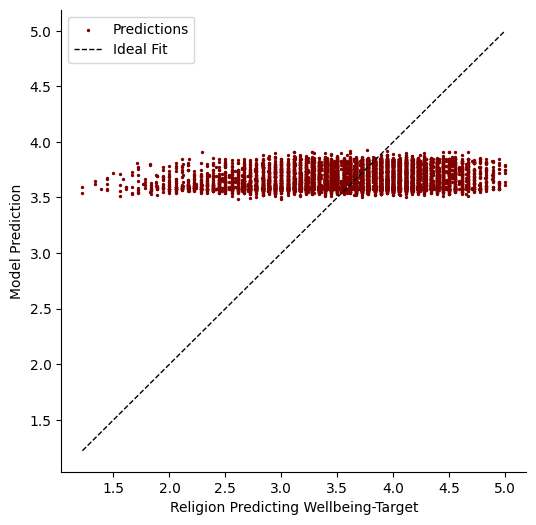

In [18]:
#Plotting the graph
# Predict using the linear model
y_pred = linear_model.predict(train_x)

# Create the figure and axis
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Scatter plot of true vs predicted values
ax.scatter(train_y, y_pred, color="maroon", s=2, label="Predictions")

# Get limits for the diagonal reference line
min_val = min(np.min(train_y), np.min(y_pred))
max_val = max(np.max(train_y), np.max(y_pred))

# Plot the black dashed diagonal line
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label="Ideal Fit")

# Set labels
ax.set_xlabel("Religion Predicting Wellbeing-Target")
ax.set_ylabel("Model Prediction")

# Remove top and right spines
sns.despine(ax=ax)

# Add legend
ax.legend()

# Show plot
plt.show()

Result: Model does not learn anything using a simple linear regression